In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from  matplotlib.ticker import FuncFormatter

In [2]:
full_response_data = pd.read_csv("../full/3.txt")
full_response_data["type"] = "full"
short_response_data = pd.read_csv("../short/3.txt")
short_response_data["type"] = "short"


In [3]:
idx_val = 0
for idx, row in full_response_data.iterrows():
    if idx_val > 29:
        idx_val = 0
    full_response_data.at[idx, "n"] = idx_val + 1
    idx_val += 1
idx_val = 0
for idx, row in short_response_data.iterrows():
    if idx_val > 29:
        idx_val = 0
    short_response_data.at[idx, "n"] = idx_val + 1
    idx_val += 1

In [4]:
combined_data = pd.concat((full_response_data, short_response_data))
combined_data["n"] = combined_data["n"].astype("int")
print(combined_data.columns)
combined_data.head()

Index(['Item', ' Dtime', 'type', 'n'], dtype='object')


,Item,Dtime,type,n
0,ひき肉,0.139186,full,1
1,ひき肉,0.257555,full,2
2,ひき肉,0.132651,full,3
3,ひき肉,0.143810,full,4
4,ひき肉,0.136940,full,5


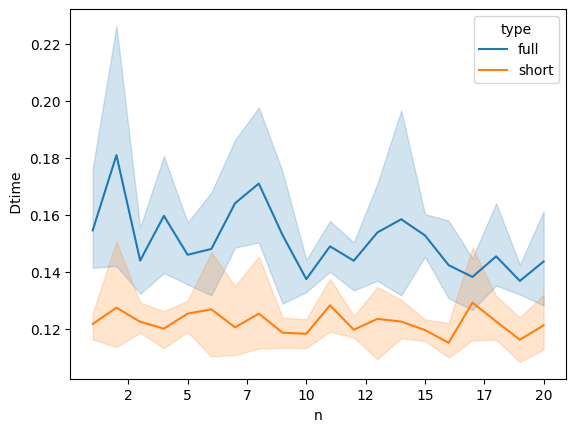

In [7]:
ax = sns.lineplot(data=combined_data, x="n", y=" Dtime", hue="type")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.savefig("request_diff.png")
plt.show()